([<matplotlib.axis.XTick at 0x29ce01d4050>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

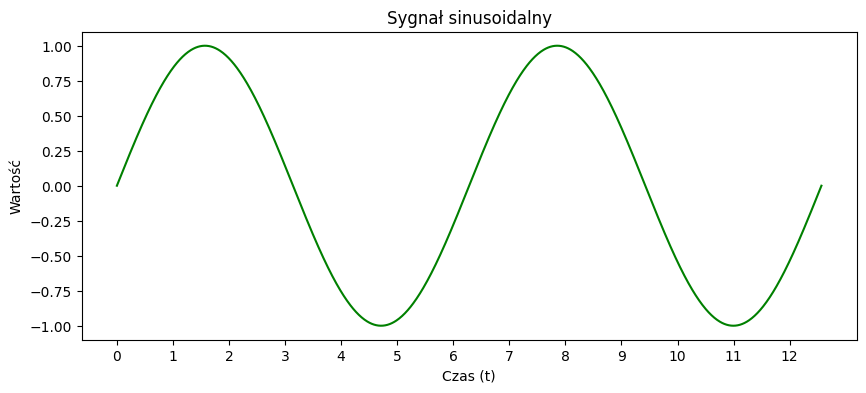

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

np.random.seed(42)

N = int(4 * np.pi * 100)
t = np.linspace(0, 4 * np.pi, N)

sine = np.sin(t)

plt.figure(figsize=(10, 4))
plt.plot(t, sine, color='green')
plt.title('Sygnał sinusoidalny')
plt.ylabel('Wartość')
plt.xlabel('Czas (t)')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))

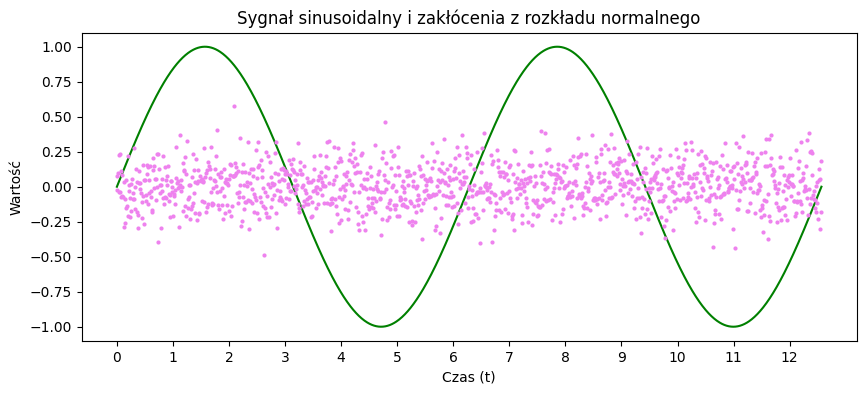

In [129]:
noise = np.random.normal(0, .15, N)

plt.figure(figsize=(10,4))
plt.plot(t, sine, color='green')
plt.plot(t, noise, 'o', markersize=2, color='violet')
plt.title('Sygnał sinusoidalny i zakłócenia z rozkładu normalnego')
plt.ylabel('Wartość')
plt.xlabel('Czas (t)')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.show()

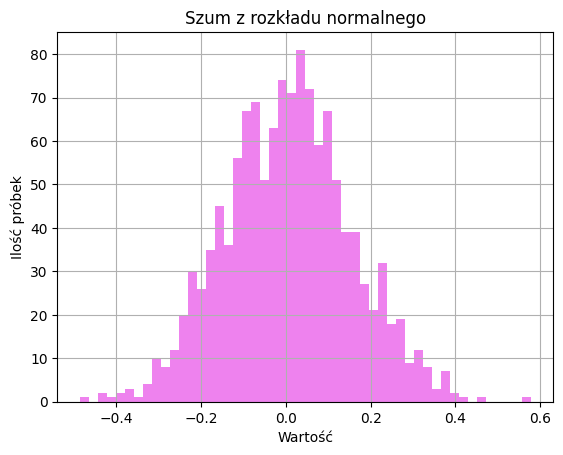

In [130]:
plt.hist(noise, bins=50, color='violet')
plt.title("Szum z rozkładu normalnego")
plt.xlabel("Wartość")
plt.ylabel("Ilość próbek")
plt.grid(True)
plt.show()

Text(0.5, 0, 'Czas (t)')

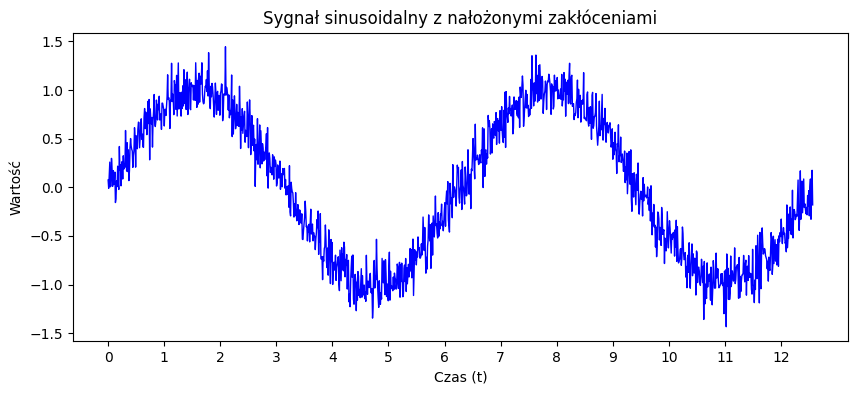

In [131]:
sine_noisy = sine + noise

plt.figure(figsize=(10,4))
plt.plot(t, sine_noisy, linewidth=1, color='blue')
plt.title('Sygnał sinusoidalny z nałożonymi zakłóceniami')
plt.ylabel('Wartość')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.xlabel('Czas (t)')

In [132]:
def delta_h_estimator(noisy_signal, clean_signal, H):
    N = len(noisy_signal)
    x_hat = np.zeros(N)
    deltas = np.zeros(N)

    for t in range(H, N):
        noisy_win = noisy_signal[t - H:t]
        x_mean = noisy_win.mean()
        deltas[t] = (x_mean - clean_signal[t])**2
        x_hat[t] = x_mean

    # Próbki, które nie mają H poprzedzających, uzupełniam średnią z tych dostępnych
    x_hat[:H] = np.mean(noisy_signal[:H])

    return np.mean(deltas[H:]), x_hat

Text(0.5, 0, 'Czas (t)')

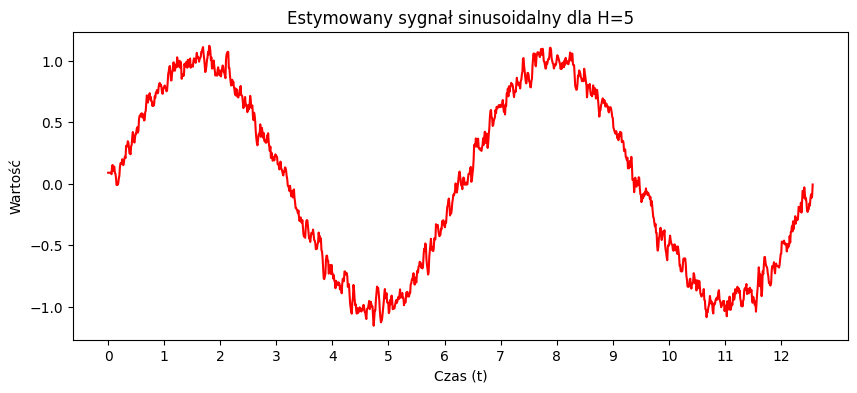

In [133]:
H = 5

mean_delta, x_hat = delta_h_estimator(sine_noisy, sine, H)

plt.figure(figsize=(10, 4))
plt.plot(t, x_hat, color='red')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.title('Estymowany sygnał sinusoidalny dla H=5')
plt.ylabel('Wartość')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.xlabel('Czas (t)')

Text(0.5, 0, 'Czas (t)')

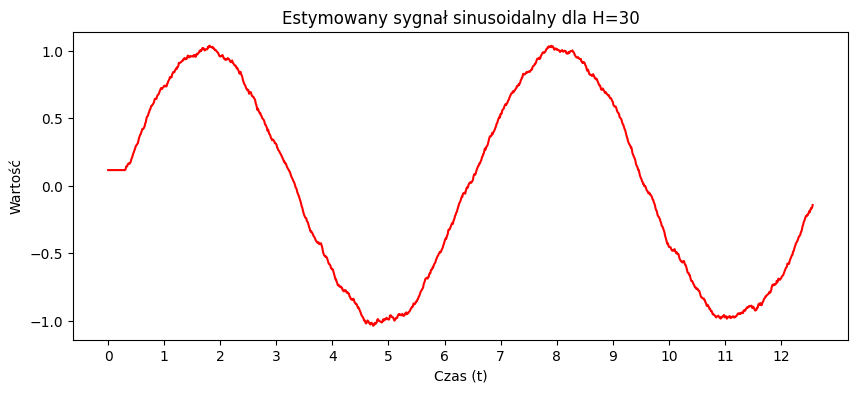

In [134]:
H = 30

mean_delta, x_hat_2 = delta_h_estimator(sine_noisy, sine, H)

plt.figure(figsize=(10, 4))
plt.plot(t, x_hat_2, color='red')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.title('Estymowany sygnał sinusoidalny dla H=30')
plt.ylabel('Wartość')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.xlabel('Czas (t)')

Text(0.5, 0, 'Czas (t)')

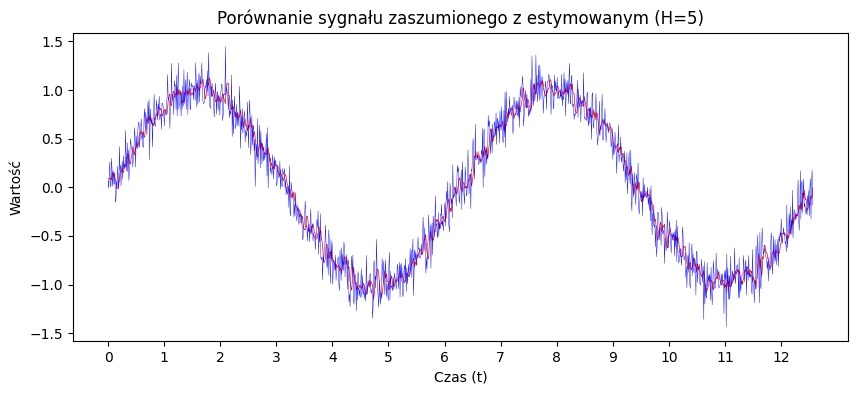

In [135]:
plt.figure(figsize=(10, 4))
plt.plot(t, x_hat, linewidth=.5, color='red')
plt.plot(t, sine_noisy, linewidth=.3, color='blue')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.title('Porównanie sygnału zaszumionego z estymowanym (H=5)')
plt.ylabel('Wartość')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.xlabel('Czas (t)')

Text(0.5, 0, 'Czas (t)')

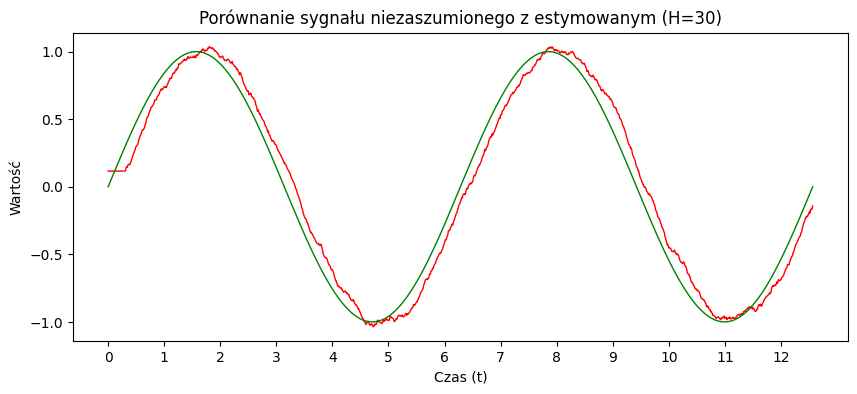

In [136]:
plt.figure(figsize=(10, 4))
plt.plot(t, x_hat_2, linewidth=1, color='red')
plt.plot(t, sine, linewidth=1, color='green')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.title('Porównanie sygnału niezaszumionego z estymowanym (H=30)')
plt.ylabel('Wartość')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.xlabel('Czas (t)')

In [137]:
print(mean_delta)
print(x_hat)

0.014509085004446762
[ 0.08887319  0.08887319  0.08887319 ... -0.11458238 -0.10037242
 -0.00685963]


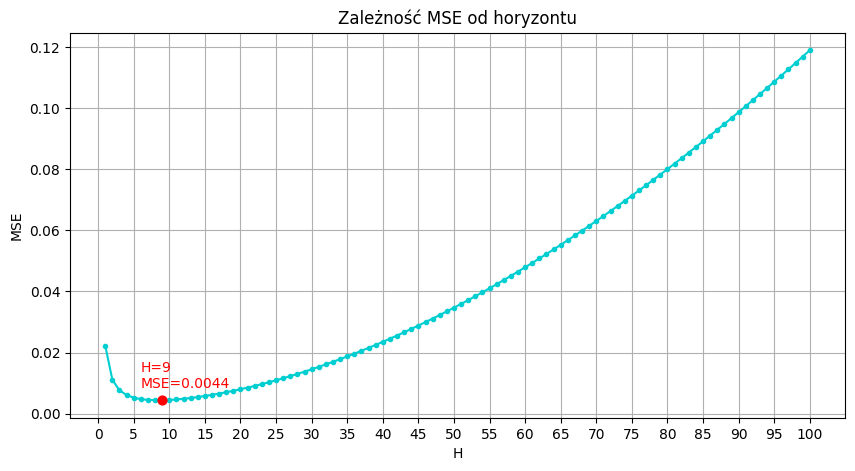

In [138]:
import numpy as np

Hs = np.arange(1, 101)
avg_deltas = [delta_h_estimator(sine_noisy, sine, H)[0] for H in Hs]

plt.figure(figsize=(10, 5))
plt.plot(Hs, avg_deltas, marker='.', color='darkturquoise')
plt.xlabel('H')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 101, step=5))
plt.title('Zależność MSE od horyzontu')
plt.grid(True)


min_idx = int(np.argmin(avg_deltas))
H_min = int(Hs[min_idx])
mse_min = avg_deltas[min_idx]

plt.scatter([H_min], [mse_min], color='red', s=40, zorder=5)
plt.annotate(f"H={H_min}\nMSE={mse_min:.4f}", xy=(H_min, mse_min),
             xytext=(H_min-3, mse_min+0.004), color='red')

plt.show()

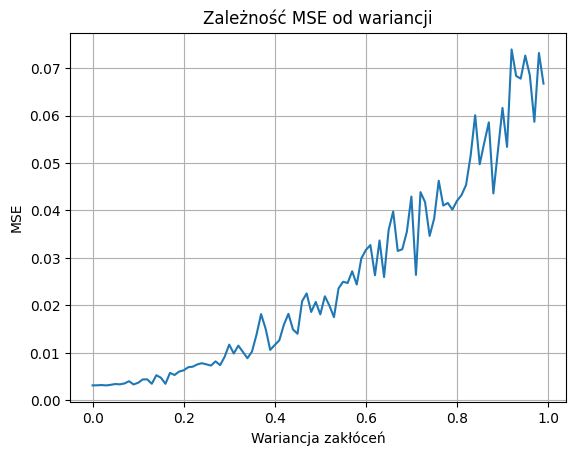

In [139]:
MSEs = []

for i in range(0, 100):
    noise2 = np.random.normal(0, i/100, N)
    sine_noisy_w = sine + noise2
    MSEs.append(delta_h_estimator(sine_noisy_w, sine, 15)[0])

plt.plot(np.arange(0, 100) / 100.0, MSEs)
plt.xlabel('Wariancja zakłóceń')
plt.ylabel('MSE')
plt.title('Zależność MSE od wariancji')
plt.grid(True)
plt.show()

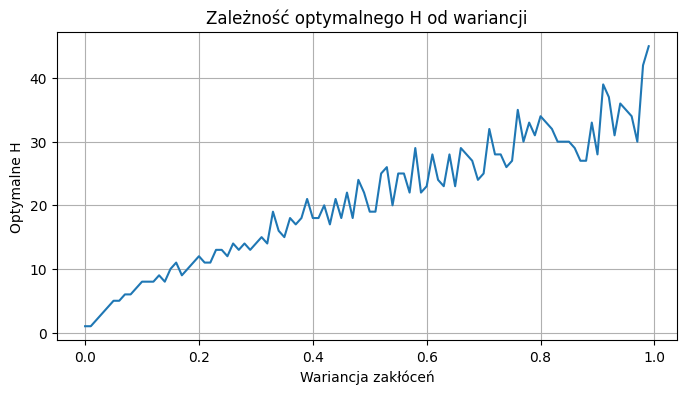

In [140]:
vars = np.arange(0, 100) / 100.0

H_opt = []
for sigma in vars:
    noise_tmp = np.random.normal(0, sigma, N)
    sine_noisy_tmp = sine + noise_tmp
    avg_deltas_tmp = [delta_h_estimator(sine_noisy_tmp, sine, H)[0] for H in Hs]
    H_opt.append(int(Hs[np.argmin(avg_deltas_tmp)]))

plt.figure(figsize=(8, 4))
plt.plot(vars, H_opt)
plt.xlabel('Wariancja zakłóceń')
plt.ylabel('Optymalne H')
plt.title('Zależność optymalnego H od wariancji')
plt.grid(True)
plt.show()